In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

sns.set_context('talk')

np.random.seed(123)

#Generate data set as normal distribution N(0,1)
data = np.random.randn(2000)
print("Mean(sd) of data: %.2f (%.2f)"% (np.average(data),np.std(data)))


Mean(sd) of data: -0.02 (0.98)


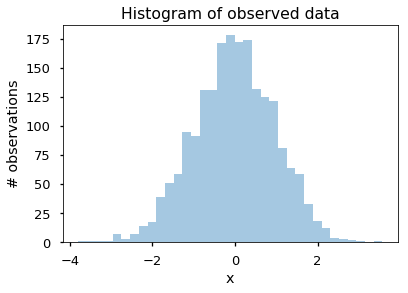

In [40]:
#Plot the distribution of the data using seaborn
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

In [41]:
#Build the model and run the MCMC (with parallel chains)
with pm.Model():
    #Prior for mu
    mu = pm.Normal('mu', 0, 1)
    #mu = pm.Uniform('mu', lower=-1, upper=1)
    
    #Prior for sigma
    sigma = pm.Uniform('sigma', lower=0.5, upper=1.5)
    #sigma = pm.InverseGamma('sigma',0.001,0.00001)
    
    #Likelihood/model
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step, njobs=4, start=[{'mu':0+.25*np.random.randn(),'sigma':1+.25*np.random.randn(),} for j in range(4)])
    
burnin=1000

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_interval__]
>Metropolis: [mu]
100%|██████████| 20500/20500 [00:06<00:00, 3112.83it/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c15ca2400>,
      dtype=object)

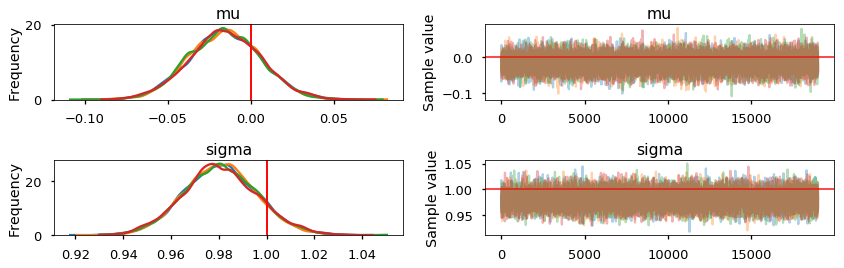

In [42]:
#Plot distributions and traces for mu and sigma
pm.traceplot(trace[burnin:], lines = {'mu':0, 'sigma':1})

{'mu': 1.0000154799031922, 'sigma': 1.0000626568427557}


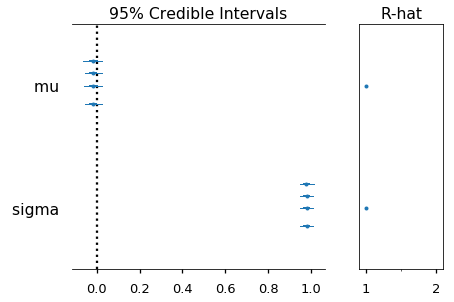

In [43]:
#Let's check for convergence by analyzing the four chains
pm.forestplot(trace[burnin:],varnames={'mu','sigma'})
print(pm.gelman_rubin(trace[burnin:]))

In [ ]:
#Notice the MC Error size
pm.summary(trace[burnin:])

In [ ]:
#Check for autocorrelation
pm.autocorrplot(trace[burnin:])

In [ ]:
#Plot the posterior with credible intervals (HPD=Highest Posterior Density)
pm.plot_posterior(trace[burnin:], kde_plot=True)

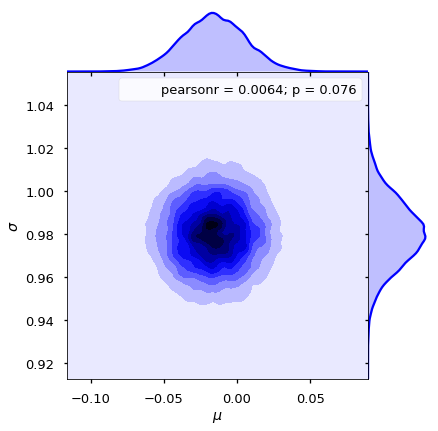

In [44]:
#Plot joint posterior distribution
jg=sns.jointplot(trace[burnin:]['mu'],trace[burnin:]['sigma'],kind="kde", color="b", space=0)\
    .set_axis_labels("$\mu$","$\sigma$")\
    .plot_joint(sns.kdeplot, zorder=0, n_levels=6)
